# Facial Emotion Recognition with Keras

## Project Definition

**Project Link:** https://www.kaggle.com/datasets/fer2013

**Challenge:** Classify facial expressions into 8 emotion categories using deep learning.

**Data:** Images of people showing different emotions (angry, disgust, fear, happy, neutral, sad, surprise, contempt).

**ML Type:** Supervised Multiclass Classification

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import cv2

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.18.0
Keras version: 3.8.0


## Data Loading and Initial Look

In [2]:
# 1. Install kagglehub if not already installed
!pip install -q kagglehub

# 3. Set the Kaggle config directory
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

import kagglehub
import os

# Download full dataset from Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)
import os

print("Folders in images/:")
print(os.listdir(path))
total_files = sum([len(files) for _, _, files in os.walk(path)])
print(f"🧾 Total image files found: {total_files}")


Path to dataset files: /kaggle/input/fer2013
Folders in images/:
['test', 'train']
🧾 Total image files found: 35887


In [3]:
import os
import numpy as np
import cv2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Set image size and data paths
img_size = (48, 48)
base_path = path  # from kagglehub
train_path = os.path.join(base_path, "train")
test_path = os.path.join(base_path, "test")

# Helper to load images and labels
def load_images_from_folder(folder_path):
    images = []
    labels = []
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        if not os.path.isdir(label_path):
            continue
        for file in os.listdir(label_path):
            if file.lower().endswith((".jpg", ".png", ".jpeg")):
                img_path = os.path.join(label_path, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, img_size)
                img = img.astype('float32') / 255.0
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# Load train and test sets
print("📥 Loading training data...")
X_train, y_train = load_images_from_folder(train_path)
print(f"✅ Loaded {X_train.shape[0]} training images")

print("📥 Loading testing data...")
X_test, y_test = load_images_from_folder(test_path)
print(f"✅ Loaded {X_test.shape[0]} testing images")

# Encode labels
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Convert labels to categorical
y_train_cat = to_categorical(y_train_enc, num_classes=len(label_encoder.classes_))
y_test_cat = to_categorical(y_test_enc, num_classes=len(label_encoder.classes_))

# Reshape input images for CNN
X_train = X_train.reshape(-1, 48, 48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)

# Label mapping
label_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\n📌 Label map:")
for name, code in label_map.items():
    print(f"{name} → {code}")


📥 Loading training data...
✅ Loaded 28709 training images
📥 Loading testing data...
✅ Loaded 7178 testing images

📌 Label map:
angry → 0
disgust → 1
fear → 2
happy → 3
neutral → 4
sad → 5
surprise → 6


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1830 - loss: 2.5500

449/449 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.1830 - loss: 2.5494 - val_accuracy: 0.1431 - val_loss: 2.6919 - learning_rate: 0.0010
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2353 - loss: 1.9632

449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.2353 - loss: 1.9631 - val_accuracy: 0.2609 - val_loss: 1.9273 - learning_rate: 0.0010
Epoch 3/50
448/449 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2925 - loss: 1.7924

449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.2926 - loss: 1.7923 - val_accuracy: 0.3002 - val_loss: 1.7931 - learning_rate: 0.0010
Epoch 4/50
448/449 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3294 - loss: 1.7005

449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.3294 - loss: 1.7005 - val_accuracy: 0.4074 - val_loss: 1.5869 - learning_rate: 0.0010
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3569 - loss: 1.6513

449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.3569 - loss: 1.6513 - val_accuracy: 0.4645 - val_loss: 1.4026 - learning_rate: 0.0010
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.3782 - loss: 1.5992 - val_accuracy: 0.4313 - val_loss: 1.5009 - learning_rate: 0.0010
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.3851 - loss: 1.5556 - val_accuracy: 0.4519 - val_loss: 1.4455 - learning_rate: 0.0010
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.4046 - loss: 1.5515 - val_accuracy: 0.4537 - val_loss: 1.4364 - learning_rate: 0.0010
Epoch 9/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.4263 - loss: 1.4986 - val_accuracy: 0.4264 - val_loss: 1.5232 - learning_rate: 0.0010
Epoch 10/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.4151 - loss: 1.5338 - val_accuracy: 0.4129 - val_loss: 1.5569 - learning_rate: 0.0010
Epoch 11/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4356 - loss: 1.465

449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.4356 - loss: 1.4658 - val_accuracy: 0.5244 - val_loss: 1.2950 - learning_rate: 5.0000e-04
Epoch 12/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.4514 - loss: 1.4228 - val_accuracy: 0.4709 - val_loss: 1.3996 - learning_rate: 5.0000e-04
Epoch 13/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4468 - loss: 1.4185

449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.4468 - loss: 1.4185 - val_accuracy: 0.5273 - val_loss: 1.2765 - learning_rate: 5.0000e-04
Epoch 14/50
448/449 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4586 - loss: 1.4000

449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.4586 - loss: 1.4000 - val_accuracy: 0.5309 - val_loss: 1.2619 - learning_rate: 5.0000e-04
Epoch 15/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.4641 - loss: 1.3851 - val_accuracy: 0.5249 - val_loss: 1.2633 - learning_rate: 5.0000e-04
Epoch 16/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4683 - loss: 1.3841

449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.4683 - loss: 1.3841 - val_accuracy: 0.5276 - val_loss: 1.2561 - learning_rate: 5.0000e-04
Epoch 17/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4700 - loss: 1.3857

449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.4700 - loss: 1.3857 - val_accuracy: 0.5380 - val_loss: 1.2177 - learning_rate: 5.0000e-04
Epoch 18/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.4639 - loss: 1.3725 - val_accuracy: 0.5215 - val_loss: 1.2534 - learning_rate: 5.0000e-04
Epoch 19/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.4718 - loss: 1.3686 - val_accuracy: 0.5163 - val_loss: 1.2591 - learning_rate: 5.0000e-04
Epoch 20/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.4738 - loss: 1.3622 - val_accuracy: 0.5123 - val_loss: 1.3073 - learning_rate: 5.0000e-04
Epoch 21/50
448/449 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4773 - loss: 1.3495

449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.4773 - loss: 1.3495 - val_accuracy: 0.5538 - val_loss: 1.1940 - learning_rate: 5.0000e-04
Epoch 22/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.4828 - loss: 1.3454 - val_accuracy: 0.5340 - val_loss: 1.2338 - learning_rate: 5.0000e-04
Epoch 23/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.4802 - loss: 1.3471 - val_accuracy: 0.5003 - val_loss: 1.3329 - learning_rate: 5.0000e-04
Epoch 24/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.4813 - loss: 1.3323 - val_accuracy: 0.5346 - val_loss: 1.2354 - learning_rate: 5.0000e-04
Epoch 25/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.4907 - loss: 1.3315 - val_accuracy: 0.5208 - val_loss: 1.2756 - learning_rate: 5.0000e-04
Epoch 26/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.4849 - loss: 1.3175 - val_accuracy: 0.5265 - val_loss: 1.2435 - learning_rate: 5.0000e-04
Epoch 27/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - ac

449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.4909 - loss: 1.3132 - val_accuracy: 0.5502 - val_loss: 1.1836 - learning_rate: 2.5000e-04
Epoch 28/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.4990 - loss: 1.2889 - val_accuracy: 0.5391 - val_loss: 1.2155 - learning_rate: 2.5000e-04
Epoch 29/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4941 - loss: 1.2843

449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.4941 - loss: 1.2843 - val_accuracy: 0.5634 - val_loss: 1.1589 - learning_rate: 2.5000e-04
Epoch 30/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.5040 - loss: 1.2817 - val_accuracy: 0.5543 - val_loss: 1.1771 - learning_rate: 2.5000e-04
Epoch 31/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.5005 - loss: 1.2836 - val_accuracy: 0.5531 - val_loss: 1.1814 - learning_rate: 2.5000e-04
Epoch 32/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.5015 - loss: 1.2902 - val_accuracy: 0.5580 - val_loss: 1.1645 - learning_rate: 2.5000e-04
Epoch 33/50
448/449 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5015 - loss: 1.2858

449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.5015 - loss: 1.2857 - val_accuracy: 0.5627 - val_loss: 1.1564 - learning_rate: 2.5000e-04
Epoch 34/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5074 - loss: 1.2759

449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.5074 - loss: 1.2759 - val_accuracy: 0.5623 - val_loss: 1.1545 - learning_rate: 2.5000e-04
Epoch 35/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.5050 - loss: 1.2831 - val_accuracy: 0.5570 - val_loss: 1.1737 - learning_rate: 2.5000e-04
Epoch 36/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.5036 - loss: 1.2643 - val_accuracy: 0.5609 - val_loss: 1.1664 - learning_rate: 2.5000e-04
Epoch 37/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.5067 - loss: 1.2638 - val_accuracy: 0.5525 - val_loss: 1.1850 - learning_rate: 2.5000e-04
Epoch 38/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.5041 - loss: 1.2520 - val_accuracy: 0.5626 - val_loss: 1.1643 - learning_rate: 2.5000e-04
Epoch 39/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.5115 - loss: 1.2449 - val_accuracy: 0.5531 - val_loss: 1.1875 - learning_rate: 2.5000e-04
Epoch 40/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - ac

449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.5127 - loss: 1.2459 - val_accuracy: 0.5676 - val_loss: 1.1471 - learning_rate: 1.2500e-04
Epoch 41/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.5157 - loss: 1.2320 - val_accuracy: 0.5656 - val_loss: 1.1553 - learning_rate: 1.2500e-04
Epoch 42/50
448/449 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5141 - loss: 1.2307

449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.5142 - loss: 1.2307 - val_accuracy: 0.5724 - val_loss: 1.1353 - learning_rate: 1.2500e-04
Epoch 43/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5178 - loss: 1.2451

449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5178 - loss: 1.2451 - val_accuracy: 0.5763 - val_loss: 1.1322 - learning_rate: 1.2500e-04
Epoch 44/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.5144 - loss: 1.2364 - val_accuracy: 0.5646 - val_loss: 1.1475 - learning_rate: 1.2500e-04
Epoch 45/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.5176 - loss: 1.2263 - val_accuracy: 0.5719 - val_loss: 1.1413 - learning_rate: 1.2500e-04
Epoch 46/50
448/449 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5109 - loss: 1.2248

449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.5109 - loss: 1.2249 - val_accuracy: 0.5765 - val_loss: 1.1167 - learning_rate: 1.2500e-04
Epoch 47/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.5203 - loss: 1.2257 - val_accuracy: 0.5719 - val_loss: 1.1438 - learning_rate: 1.2500e-04
Epoch 48/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.5182 - loss: 1.2380 - val_accuracy: 0.5660 - val_loss: 1.1559 - learning_rate: 1.2500e-04
Epoch 49/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.5297 - loss: 1.2166 - val_accuracy: 0.5775 - val_loss: 1.1272 - learning_rate: 1.2500e-04
Epoch 50/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.5219 - loss: 1.2101 - val_accuracy: 0.5745 - val_loss: 1.1343 - learning_rate: 1.2500e-04


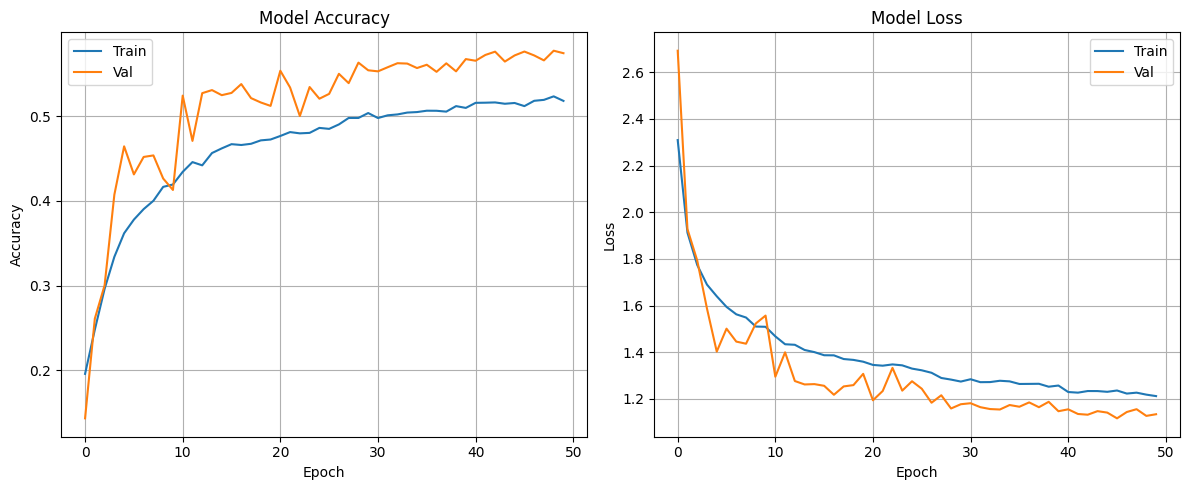

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt

# 1. Build CNN model
def create_emotion_cnn(input_shape=(48, 48, 1), num_classes=7):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = create_emotion_cnn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 2. Data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# 3. Class weights to handle imbalance
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(np.argmax(y_train_cat, axis=1)),
                                     y=np.argmax(y_train_cat, axis=1))
class_weight_dict = dict(enumerate(class_weights))

# 4. Callbacks
cb = [
    callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(patience=5, factor=0.5, min_lr=1e-6),
    callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
]

# 5. Train the model
history = model.fit(
    datagen.flow(X_train, y_train_cat, batch_size=64),
    epochs=50,
    validation_data=(X_test, y_test_cat),
    class_weight=class_weight_dict,
    callbacks=cb,
    verbose=1
)

# 6. Plot accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train")
plt.plot(history.history['val_accuracy'], label="Val")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train")
plt.plot(history.history['val_loss'], label="Val")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [5]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"✅ Test accuracy: {test_acc:.4f}, loss: {test_loss:.4f}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5743 - loss: 1.0855
✅ Test accuracy: 0.5765, loss: 1.1167


In [6]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_labels = y_pred.argmax(axis=1)
y_true = y_test_cat.argmax(axis=1)

print(classification_report(y_true, y_pred_labels, target_names=label_map.keys()))


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

       angry       0.46      0.51      0.48       958
     disgust       0.21      0.69      0.32       111
        fear       0.44      0.22      0.29      1024
       happy       0.87      0.78      0.82      1774
     neutral       0.52      0.61      0.56      1233
         sad       0.48      0.42      0.44      1247
    surprise       0.63      0.83      0.72       831

    accuracy                           0.58      7178
   macro avg       0.51      0.58      0.52      7178
weighted avg       0.59      0.58      0.57      7178



<Axes: >

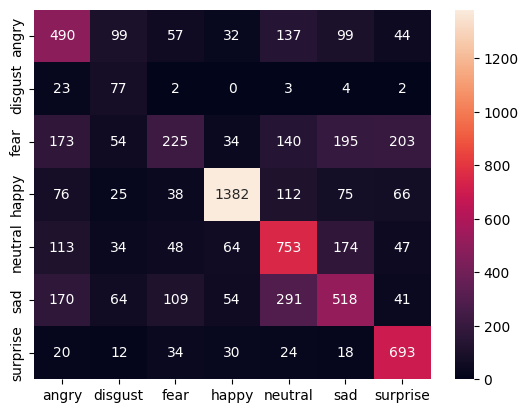

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_map.keys(), yticklabels=label_map.keys())